In [6]:
# import necessary libraries 
import gym
import tensorflow as tf

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
from gym import Env

import pickle

class QLearning:
    """ Q-Learning Algorithm

    Q-Learning is a model-free reinforcement learning policy
    which will find the next best action to take in a given a state.
    It chooses this action at random and aims to maximize the reward.
    """

    def q_table(self, observation_space: int, action_space: int) -> NDArray[np.float64]:
        """ Creates a Q-Table of size (observation_space, action_space).
        For Gym's Taxi-v3 environment, the Q-Table will be of size (500, 6).

        Returns:
            NDArray[np.float64]: Return a Q-Table of zeros in shape (500, 6).
        """
        return np.zeros((observation_space, action_space))

    def train(self, env: Env, N_EPISODES: int, MAX_STEPS: int, LEARNING_RATE: float, DISCOUNT_FACTOR: float, EPSILON: float, EPSILON_DECAY: float, EPSILON_MIN: float):
        """_summary_

        Args:
            N_EPISODES (int): _description_
            MAX_STEPS (int): _description_
            LEARNING_RATE (float): _description_
            DISCOUNT_FACTOR (float): _description_
            EPSILON (float): _description_
            EPSILON_DECAY (float): _description_
            EPSILON_MIN (float): _description_
        """

        observation_space = int(env.observation_space.n) # Number of states (500)
        action_space = int(env.action_space.n) # Number of states (500)
        q_table = self.q_table(observation_space, action_space)

        rewards = np.zeros(N_EPISODES)

        for episode in range(N_EPISODES):
            print(f"Episode: {episode}") 
            state = env.reset()[0]
            done = False

            current_reward = 0
            current_step = 0
            over_step_limit = current_step >= MAX_STEPS
            while not done and not over_step_limit:
                current_step += 1
                # Choose an action
                if np.random.uniform(0, 1) < EPSILON:
                    action = env.action_space.sample()
                else:
                    action = np.argmax(q_table[state, :])

                # Take the action
                next_state, reward, terminated, truncated, _ = env.step(action)

                current_reward += reward

                # Update the Q-Table
                q_table[state, action] = q_table[state, action] + LEARNING_RATE * (reward + DISCOUNT_FACTOR * np.max(q_table[next_state, :]) - q_table[state, action])

                state = next_state

                if terminated or truncated:
                    done = True

            # Decay the epsilon value
            EPSILON = max(EPSILON_MIN, EPSILON_DECAY * EPSILON)

            rewards[episode] = current_reward
        
        env.close()
        
        for e in range(N_EPISODES):
            plt.plot(rewards[episode])

        with open('taxi.pk1', 'wb') as f:
            pickle.dump(q_table, f)
            f.close()
    
    def test(self, env: Env, N_EPISODES: int, MAX_STEPS: int):
        with open('taxi.pk1', 'rb') as f:
            q_table = pickle.load(f)
            f.close()

        rewards = np.zeros(N_EPISODES)

        for episode in range(N_EPISODES):
            print(f"Episode: {episode}")
            state = env.reset()[0]
            done = False

            current_reward = 0
            current_step = 0
            over_step_limit = current_step >= MAX_STEPS
            while not done and not over_step_limit:
                current_step += 1
                action = np.argmax(q_table[state, :])

                next_state, reward, terminated, truncated, _ = env.step(action)

                current_reward += reward

                state = next_state

                if terminated or truncated:
                    done = True

            rewards[episode] = current_reward
        
        env.close()
    

Episode: 0
Episode: 1
Episode: 2
Episode: 3
Episode: 4
Episode: 5
Episode: 6
Episode: 7
Episode: 8
Episode: 9
Episode: 10
Episode: 11
Episode: 12
Episode: 13
Episode: 14
Episode: 15
Episode: 16
Episode: 17
Episode: 18
Episode: 19
Episode: 20
Episode: 21
Episode: 22
Episode: 23
Episode: 24
Episode: 25
Episode: 26
Episode: 27
Episode: 28
Episode: 29
Episode: 30
Episode: 31
Episode: 32
Episode: 33
Episode: 34
Episode: 35
Episode: 36
Episode: 37
Episode: 38
Episode: 39
Episode: 40
Episode: 41
Episode: 42
Episode: 43
Episode: 44
Episode: 45
Episode: 46
Episode: 47
Episode: 48
Episode: 49
Episode: 50
Episode: 51
Episode: 52
Episode: 53
Episode: 54
Episode: 55
Episode: 56
Episode: 57
Episode: 58
Episode: 59
Episode: 60
Episode: 61
Episode: 62
Episode: 63
Episode: 64
Episode: 65
Episode: 66
Episode: 67
Episode: 68
Episode: 69
Episode: 70
Episode: 71
Episode: 72
Episode: 73
Episode: 74
Episode: 75
Episode: 76
Episode: 77
Episode: 78
Episode: 79
Episode: 80
Episode: 81
Episode: 82
Episode: 83
Ep

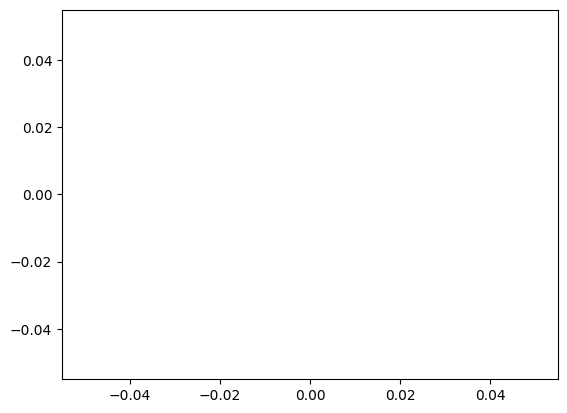

In [8]:
ql = QLearning()
ql.train(
    env = gym.make('Taxi-v3', render_mode=None),
    LEARNING_RATE=0.9,
    DISCOUNT_FACTOR=0.9,
    N_EPISODES=1000,
    MAX_STEPS=1000,
    EPSILON=1.0,
    EPSILON_DECAY=0.0001,
    EPSILON_MIN=0.1
)

In [12]:
env = gym.make('Taxi-v3', render_mode='human')
observation, info = env.reset(seed=42)

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
env.close()

Episode: 0


/home/jensen/miniconda3/envs/acit4610_4/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


KeyboardInterrupt: 